## Inicializacion de los datos

In [2]:
# Importando los modulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Tu enlace de Drive
enlace_drive = "https://drive.google.com/file/d/1yVYHGs5HqhRjY2oINnA_EMmQdUbxJiqi/view?usp=sharing"

# Extraer el FILE_ID
file_id = enlace_drive.split('/d/')[1].split('/view')[0]

# Crear URL para descargar
url_descarga = f'https://drive.google.com/uc?id={file_id}'

# Cargando el dataset a utilizar en el objeto dataframe
raw_data = pd.read_csv(url_descarga, index_col=0, parse_dates=True)
df_completo = raw_data.copy()

In [4]:
df_completo.head() # Mostrando el encabezado del dataset

Open      High       Low     Close    Volume  \
Date                                                                          
1980-03-17 00:00:00-05:00  0.181500  0.184404  0.181500  0.181500  10924800   
1980-03-18 00:00:00-05:00  0.181500  0.182952  0.180048  0.180048  17068800   
1980-03-19 00:00:00-05:00  0.184404  0.187308  0.184404  0.184404  18508800   
1980-03-20 00:00:00-05:00  0.184403  0.186581  0.183678  0.183678  11174400   
1980-03-21 00:00:00-05:00  0.180048  0.180048  0.177143  0.177143  12172800   

                           Dividends  Stock Splits  
Date                                                
1980-03-17 00:00:00-05:00        0.0           0.0  
1980-03-18 00:00:00-05:00        0.0           0.0  
1980-03-19 00:00:00-05:00        0.0           0.0  
1980-03-20 00:00:00-05:00        0.0           0.0  
1980-03-21 00:00:00-05:00        0.0           0.0

In [5]:
df_completo.tail() # Mostrando el final del dataset

Open       High        Low      Close  \
Date                                                                    
2024-12-18 00:00:00-05:00  20.480000  20.580000  19.209999  19.299999   
2024-12-19 00:00:00-05:00  19.530001  19.690001  19.030001  19.059999   
2024-12-20 00:00:00-05:00  18.969999  19.760000  18.900000  19.520000   
2024-12-23 00:00:00-05:00  19.580000  20.230000  19.520000  20.200001   
2024-12-24 00:00:00-05:00  20.219999  20.400000  19.959999  20.400000   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-12-18 00:00:00-05:00   86041200        0.0           0.0  
2024-12-19 00:00:00-05:00   69117800        0.0           0.0  
2024-12-20 00:00:00-05:00  108453700        0.0           0.0  
2024-12-23 00:00:00-05:00   57988400        0.0           0.0  
2024-12-24 00:00:00-05:00   29884000        0.0           0.0

## Ajustando el dataset

In [6]:
df_completo.isna().sum() # Mostrando la cantidad de valores nulos

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
# Solamente tomamos en cuenta la columna de 'Precio de Cierre'
df_completo['precio_de_cierre'] = df_completo.Close

# Eliminando el resto de columnas del data set
del df_completo['Open']
del df_completo['High']
del df_completo['Low']
del df_completo['Close']
del df_completo['Dividends']
del df_completo['Volume']
del df_completo['Stock Splits']

In [8]:
df_completo.head() # Mostrando el encabezado del dataset actualizado

precio_de_cierre
Date                                       
1980-03-17 00:00:00-05:00          0.181500
1980-03-18 00:00:00-05:00          0.180048
1980-03-19 00:00:00-05:00          0.184404
1980-03-20 00:00:00-05:00          0.183678
1980-03-21 00:00:00-05:00          0.177143

## The QQ Plot

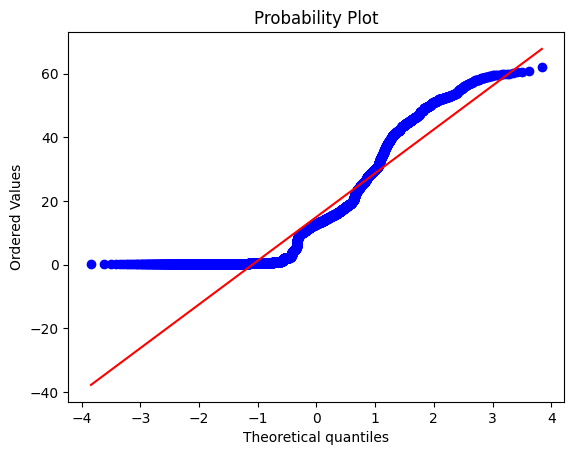

In [9]:
import scipy.stats as stats
import pylab

stats.probplot(df_completo.precio_de_cierre, dist="norm", plot=pylab)
pylab.show()

Utilizamos el gr√°fico QQ (Quantile-Quantile) para analizar si los datos siguen una distribuci√≥n normal. Sin embargo, al tratarse de una serie temporal, esta no cumple con dicha distribuci√≥n debido a tendencias y correlaciones entre observaciones.

Por ello, emplearemos m√©todos m√°s adecuados para series temporales, como transformaciones (logaritmos o diferenciaci√≥n), pruebas de estacionariedad (Dickey-Fuller) o modelos como ARIMA, que no requieren normalidad pero permiten capturar patrones y tendencias. Estos enfoques nos ayudar√°n a realizar inferencias m√°s precisas.

## Visualizacion de los datos

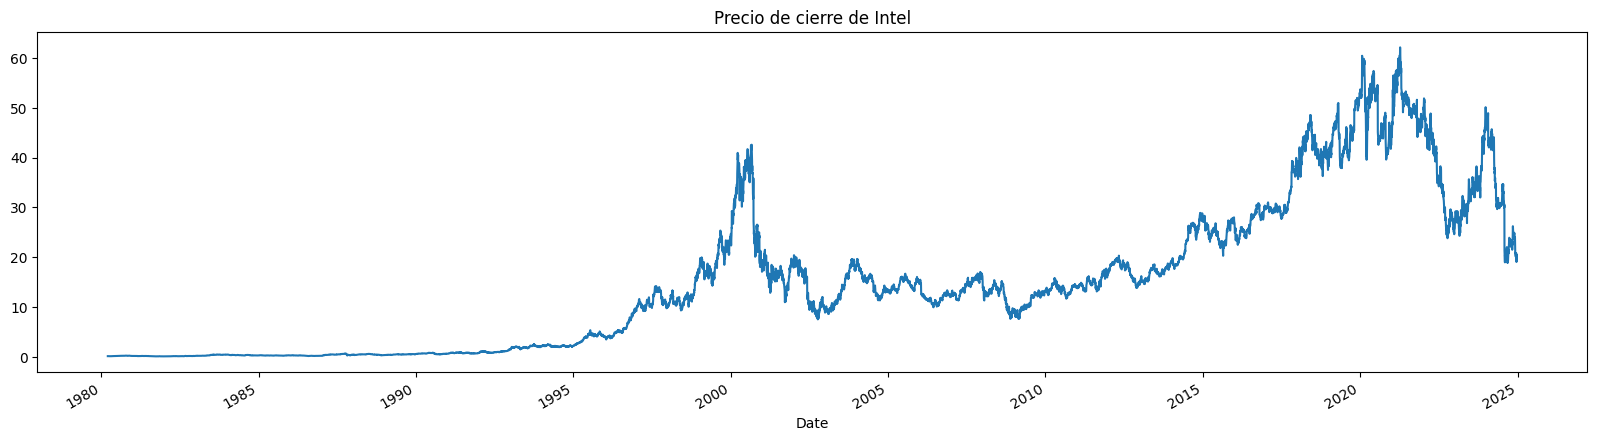

In [10]:
df_completo.precio_de_cierre.plot(figsize=(20,5)) # Mostrando los precios de cierre de Intel
plt.title("Precio de cierre de Intel")
plt.show()

In [11]:
df_completo.describe() # Mostrando las estadisticas del dataset

precio_de_cierre
count      11289.000000
mean          14.985933
std           14.709644
min            0.120516
25%            0.814571
50%           12.742243
75%           22.617407
max           62.083344

## Comprobando estacionariedad

In [12]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [13]:
# Comprobando la estacionariedad utilizando la prueba Dickey-Fuller
sts.adfuller(df_completo['precio_de_cierre'])

(np.float64(-1.708596081237806),
 np.float64(0.42668904820696824),
 40,
 11248,
 {'1%': np.float64(-3.4309315071996833),
  '5%': np.float64(-2.861796994731415),
  '10%': np.float64(-2.566906793183969)},
 np.float64(16371.904174754007))

Es el valor calculado de la estad√≠stica ADF. Este valor se compara con los valores cr√≠ticos para determinar si podemos rechazar la hip√≥tesis nula de no estacionariedad.

El estad√≠stico ADF (-1.7086) no es menor que los valores cr√≠ticos para los niveles del 1%, 5% o 10%.

Por lo tanto, como el valor ADF no es menor que los valores cr√≠ticos entonces no podemos rechazar la hip√≥tesis nula, por ende la serie **no** es **estacionaria**.

## Descomposicion de la serie (tendencia, estacionalidad y residuales)

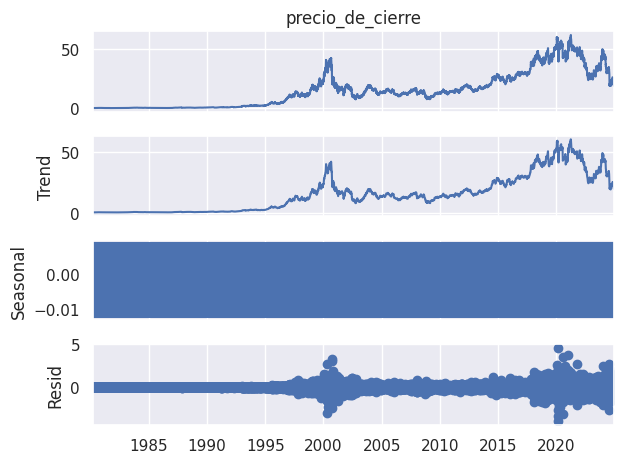

In [14]:
# Mostrando el analisis de tendencia de la grafica en un modelos aditivo
descomposed = seasonal_decompose(df_completo.precio_de_cierre, model='additive', period=5)
descomposed.plot()
plt.show()

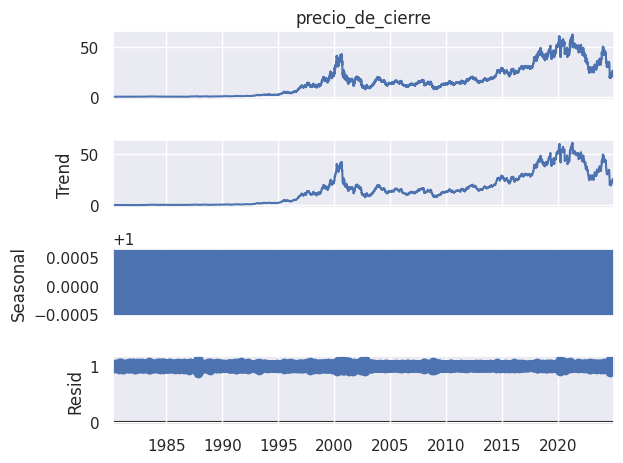

In [15]:
# Mostrando el analisis de tendencia de la grafica en un modelo multiplicativo
descomposed = seasonal_decompose(df_completo.precio_de_cierre, model='multiplicative', period=5)
descomposed.plot()
plt.show()

* **La estacionalidad es insignificante**: Ambos modelos (aditivo y multiplicativo) confirman que los precios de cierre de Intel no tienen un patr√≥n estacional claro. Esto es com√∫n en series financieras, donde las fluctuaciones suelen estar m√°s relacionadas con eventos externos, tendencias de mercado, o volatilidad inherente.

* **Tendencia bien representada**: El modelo multiplicativo captura adecuadamente la tendencia general, pero las fluctuaciones residuales indican que todav√≠a hay elementos no explicados que podr√≠an requerir modelos m√°s complejos (ARIMA, GARCH, etc.).

* **Residuos m√°s controlados**: En este caso, el modelo multiplicativo parece manejar mejor la relaci√≥n entre los componentes, pero sigue siendo insuficiente para explicar ciertos picos y ca√≠das dr√°sticas.

## Filtro de Hodrick-Prescrott (HP)

**Introduccion**

El filtro de Hodrick-Prescott (HP) es una herramienta econom√©trica que se utiliza principalmente para descomponer una serie temporal econ√≥mica en dos componentes:

1. Tendencia a largo plazo (ciclo econ√≥mico estructural)
2. Ciclo o fluctuaciones a corto plazo (componentes c√≠clicos o ruido)

**Objetivos del filtro HP**

* Identificar ciclos econ√≥micos: boom, recesi√≥n, recuperaci√≥n, etc.
* Detectar desviaciones respecto al crecimiento potencial de la econom√≠a
* Comparar el desempe√±o econ√≥mico real vs. tendencial
* Realizar pol√≠ticas macroecon√≥micas m√°s informadas

In [16]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Ahora vamos a aplicar el filtro de Heidrick-Prescott para obtener la tendencia y los ciclos de la serie de tiempo
gdp_cycle, gdp_trend = hpfilter(df_completo.precio_de_cierre, lamb=1600)

# Creamos las columnas de ciclo y tendencia
df_completo['ciclo'] = gdp_cycle
df_completo['tendencia'] = gdp_trend

df_completo.head() # Mostramos las nuevas columnas

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


precio_de_cierre     ciclo  tendencia
Date                                                            
1980-03-17 00:00:00-05:00          0.181500  0.000947   0.180552
1980-03-18 00:00:00-05:00          0.180048  0.000177   0.179871
1980-03-19 00:00:00-05:00          0.184404  0.005213   0.179190
1980-03-20 00:00:00-05:00          0.183678  0.005167   0.178511
1980-03-21 00:00:00-05:00          0.177143 -0.000693   0.177837

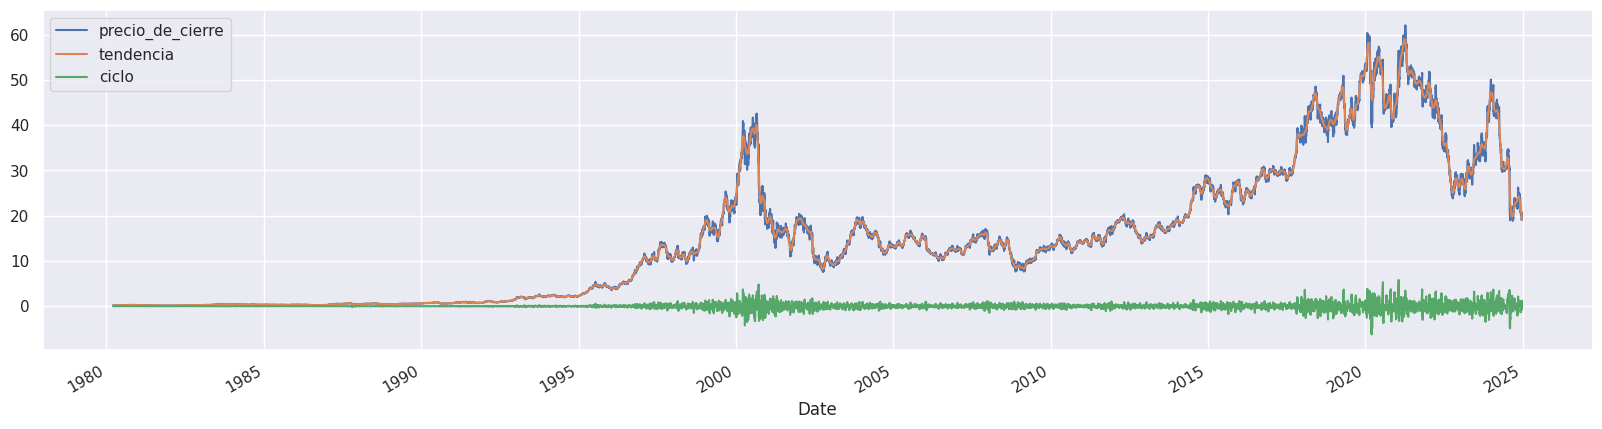

In [17]:
df_completo[['precio_de_cierre', 'tendencia', 'ciclo']].plot(figsize=(20, 5)) # Graficamos los resultados del precio de cierre junto con las variables analizadas
plt.show()

### 1. El Componente C√≠clico

El componente c√≠clico representa las **fluctuaciones de corto a mediano plazo** de una serie de tiempo alrededor de su tendencia de largo plazo. Es el resultado de la extracci√≥n de la tendencia de la serie original. Captura las desviaciones de la serie con respecto a su trayectoria suave y subyacente. Su valor puede ser positivo (la serie est√° por encima de su tendencia) o negativo (la serie est√° por debajo de su tendencia). Su amplitud y frecuencia reflejan la intensidad y la rapidez de estas desviaciones.

### 2. La Tendencia

La tendencia es el **movimiento suave y de largo plazo** que exhibe una serie de tiempo, una vez que se han eliminado las fluctuaciones c√≠clicas, estacionales (si las hubiera) e irregulares. Representa la direcci√≥n fundamental y sostenida de la serie a lo largo del tiempo, mostrando su trayectoria subyacente de crecimiento o declive. Es la componente de la serie que cambia m√°s lentamente y refleja los factores estructurales o fundamentales que la impulsan en el horizonte temporal analizado.

### 3. La Gr√°fica Completa

La gr√°fica completa representa la **descomposici√≥n visual de una serie de tiempo** en sus componentes principales: la serie original, su tendencia y su componente c√≠clico. Permite una visualizaci√≥n simult√°nea de c√≥mo la serie original se comporta en relaci√≥n con su trayectoria fundamental (tendencia) y sus desviaciones temporales (ciclo). Al superponer estas tres l√≠neas, la gr√°fica facilita la identificaci√≥n de patrones de largo plazo, la magnitud de las fluctuaciones c√≠clicas y c√≥mo estas interact√∫an para formar la serie observada.

## Autocorrelaci√≥n (ACF)

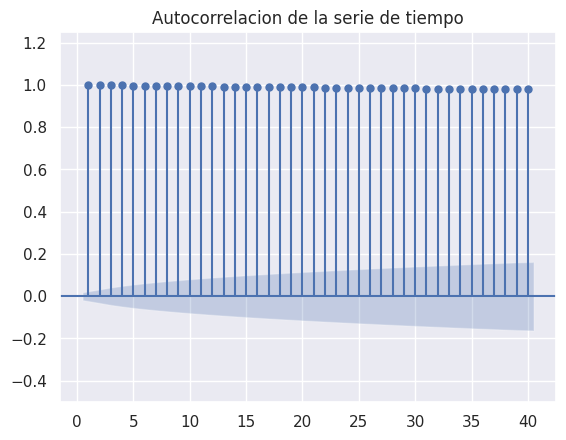

In [18]:
from statsmodels.graphics.tsaplots import plot_acf # Importamos el modulo necesario para hacer la ACF

plot_acf(df_completo['precio_de_cierre'], lags=40, zero=False)
plt.ylim(-0.5,1.25)
plt.title("Autocorrelacion de la serie de tiempo")
plt.show()

El grafico de ACF sugerido nos dice que existe una autocorrelacion positiva entre los datos. Cada punto de la linea representa la cantidad de dias de retraso, por ejemplo el primero es un dia de retraso, el segundo son 2 dias de retraso y asi sucesivamente.

Tambien podemos apreciar una muy tenue tendencia a que los precios bajen en un periodo de 40 dias, esto nos dice que al ser tan tenue podemos considerar que los precios de hace 40 dias no variaran tanto con respecto a los del presente, esto lo tendremos en cuenta para hacer modelos proximamente.

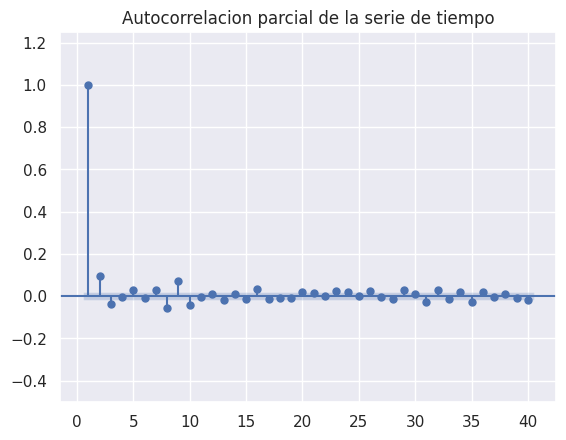

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf # Importamos el modulo necesario para hacer la PACF

plot_pacf(df_completo['precio_de_cierre'], lags=40, zero=False, method=('ols'))
plt.ylim(-0.5,1.25)
plt.title("Autocorrelacion parcial de la serie de tiempo")
plt.show()

# An√°lisis de la Funci√≥n de Autocorrelaci√≥n Parcial (PACF) de los Precios de Intel

Este documento presenta el an√°lisis de la Funci√≥n de Autocorrelaci√≥n Parcial (PACF) de los precios de las acciones de Intel, abarcando el per√≠odo desde 1980 hasta 2025.

---

### ¬øQu√© es la Funci√≥n de Autocorrelaci√≥n Parcial (PACF)?

En el an√°lisis de series de tiempo, la **Funci√≥n de Autocorrelaci√≥n Parcial (PACF)** es una herramienta estad√≠stica que mide la correlaci√≥n directa entre una observaci√≥n en un momento dado ($Y_t$) y una observaci√≥n anterior ($Y_{t-k}$), *despu√©s de haber eliminado la influencia de todas las observaciones intermedias* ($Y_{t-1}, Y_{t-2}, ..., Y_{t-k+1}$).

A diferencia de la Funci√≥n de Autocorrelaci√≥n (ACF), que mide la correlaci√≥n total entre una observaci√≥n y sus rezagos (incluyendo efectos indirectos), la PACF a√≠sla la correlaci√≥n "pura" o directa. Esta propiedad la hace especialmente √∫til para identificar el orden ($p$) de los modelos autoregresivos (AR) en la modelaci√≥n de series de tiempo (e.g., modelos ARIMA). Para un proceso AR($p$), la PACF t√≠picamente mostrar√° picos significativos hasta el lag $p$ y luego se "cortar√°" abruptamente (las barras caer√°n dentro del intervalo de confianza).

---

**Conclusiones Clave:**

1.  **Significancia en el Lag 1:** Se observa un pico muy pronunciado y significativo en el **lag 1**. Esta barra claramente excede las bandas azules (que representan el intervalo de confianza del 95%), indicando una fuerte correlaci√≥n parcial entre el precio actual de Intel y su precio en el per√≠odo inmediatamente anterior.

2.  **Corte Abrupto (Cut-off):** A partir del lag 2 y en adelante, pr√°cticamente todas las barras de autocorrelaci√≥n parcial caen dentro de las bandas de confianza azules. Esto significa que los coeficientes de autocorrelaci√≥n parcial para estos lags son estad√≠sticamente no significativos. La correlaci√≥n entre el precio actual y precios de per√≠odos m√°s lejanos en el tiempo (m√°s all√° del lag 1) se considera explicada por la correlaci√≥n con el lag inmediatamente anterior.

3.  **Indicaci√≥n de un Proceso AR(1):** El patr√≥n observado en este gr√°fico (un pico significativo en el lag 1 y un corte abrupto despu√©s) es una caracter√≠stica distintiva de un **proceso autoregresivo de orden 1 (AR(1))**. Esto sugiere que la mejor manera de modelar la dependencia lineal de los precios de Intel es considerando que el precio actual depende directamente solo del precio del per√≠odo anterior.

**Implicaciones para el Modelado:**

Basado en este an√°lisis de la PACF, se podr√≠a inferir que un modelo AR(1) podr√≠a ser un buen punto de partida para modelar la din√°mica de los precios de Intel. Es importante complementar este an√°lisis con el de la Funci√≥n de Autocorrelaci√≥n (ACF) y pruebas de estacionariedad para confirmar la elecci√≥n del modelo adecuado.

## Conclusiones

# üß† An√°lisis hist√≥rico del precio de cierre de Intel (1980 - 2025)

Este an√°lisis se basa en el comportamiento hist√≥rico del precio de las acciones de Intel a lo largo de varias d√©cadas. A continuaci√≥n se describe la evoluci√≥n por periodos:

---

## üìÖ 1990s ‚Äì Auge por los procesadores Pentium

- Intel domin√≥ el mercado con sus procesadores **Pentium**, lo que impuls√≥ una enorme demanda de computadoras personales (PC).
- La revoluci√≥n de la computaci√≥n dom√©stica elev√≥ el precio de sus acciones.
- Fue un **motor clave de la revoluci√≥n inform√°tica**.

---

## üìÖ 2000s ‚Äì Burbuja punto com y declive

- En el a√±o 2000, el precio alcanz√≥ un **pico hist√≥rico** impulsado por la especulaci√≥n en el sector tecnol√≥gico.
- Sin embargo, la **burbuja .com estall√≥**, lo que provoc√≥ una ca√≠da abrupta en muchas tecnol√≥gicas, incluida Intel.
- P√©rdida de confianza en el mercado e incertidumbre.

---

## üìÖ 2003 a 2015 ‚Äì Estancamiento tecnol√≥gico

- Aunque la empresa segu√≠a operando con ganancias, hubo una **falta de innovaci√≥n disruptiva**.
- La llegada de los **smartphones y tablets debilit√≥ el mercado de PCs**, reduciendo el crecimiento de la compa√±√≠a.
- **Intel no logr√≥ adaptarse a tiempo al boom m√≥vil**, como s√≠ lo hicieron otras empresas (Apple, Qualcomm).

---

## üìÖ 2016 a 2020 ‚Äì Resurgimiento por centros de datos

- Intel se benefici√≥ del crecimiento de la **computaci√≥n en la nube**, los **servidores** y **data centers**.
- Fue l√≠der en la infraestructura tecnol√≥gica que soporta la digitalizaci√≥n global.
- Se convirti√≥ en el **rey de los centros de datos**.

---

## üìÖ 2020 a 2025 ‚Äì Competencia feroz y p√©rdida de liderazgo

- **Apple dej√≥ de usar chips Intel** para sus Mac, apostando por sus propios chips (M1 y sucesores).
- La empresa **qued√≥ rezagada en la fabricaci√≥n** de chips avanzados frente a competidores como TSMC.
- **Nvidia** y **AMD** tomaron protagonismo en sectores clave como inteligencia artificial, gaming y HPC (computaci√≥n de alto rendimiento).
- El precio de las acciones **cay√≥ dr√°sticamente** debido a una p√©rdida de confianza e innovaci√≥n.

---

## üìâ Conclusi√≥n

Intel ha sido un actor clave en la historia de la tecnolog√≠a, pero su trayectoria tambi√©n refleja c√≥mo la **falta de adaptaci√≥n tecnol√≥gica y la fuerte competencia pueden erosionar el liderazgo de d√©cadas**. No obstante, a√∫n cuenta con recursos para reinventarse si toma decisiones estrat√©gicas a futuro.

